In [1]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt


In [2]:
os.chdir(r"C:\Users\Yanwho\OneDrive\Documents\python-api-challenge")

In [3]:
from config import api_key

In [4]:
from datetime import date

today = date.today()

d1 = today.strftime("%m/%d/%Y")
print("Today's Date:", d1)

Today's Date: 01/15/2021


In [5]:
# create list of random latitudes evenly distributed across globe

lat = np.random.uniform(low=-90.000, high=90.000, size=2000)

In [6]:
# create list of random longitudes evenly distributed across globe

long = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [7]:
# combine lat and long

latlong = zip(lat, long)

In [8]:
# create list of latitude and longitude combinations 

coordinates=list(latlong)

In [9]:
latlong

In [10]:
coordinates

[(-50.069301877633144, 111.2508705952751),
 (-87.529274850623, 155.65006930873858),
 (41.387254645699045, 45.08696944381438),
 (-48.87534599865765, -31.08635314267596),
 (-53.45619527855309, -101.64094711296461),
 (85.9112850823318, -21.13870085279379),
 (-82.02732526656449, 101.13066485668975),
 (76.55129399150098, 61.217330049088105),
 (-89.71703326243181, 31.11873603861713),
 (36.46974306051864, -14.083147537496842),
 (71.0315182810169, 28.602066319943134),
 (66.65109306362581, -8.776347197955204),
 (-13.963227538363839, 164.8103872446905),
 (-2.8334597118887075, -65.82278129672771),
 (45.04306818605622, 63.55828577510442),
 (-11.605323003378345, 152.62079226924521),
 (-4.945816016498441, 101.82675805825397),
 (-45.229433364089395, -51.975837950412256),
 (-59.249045704943754, -16.092678734453102),
 (-11.548832541615184, 107.22733582250618),
 (81.4638232849716, -24.29806022213745),
 (-83.75142044585837, -12.878676425477437),
 (-76.70363898340345, 141.42100992305433),
 (34.29398913172

In [11]:
# create empty lists to be populated in loops

cities=[]

city_name=[]
city_id=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]

In [12]:
# populate cities list

for x in coordinates:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)
  

In [13]:
# create vairable for base url to be used when making api calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# city = []



In [14]:
# loop through city names and create unique api calls for each city
# populate lists for desired fields from returned json
# skip cities that so not result in a successful api call

for city in cities:

    query_url = url + "&appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()

    try:
        city_name.append(weather_response["name"])
        city_id.append(weather_response["id"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        print(city, "success")
    except:
        print(city, "CITY NOT FOUND!")
    pass


albany success
bluff success
gardabani success
cidreira success
castro success
illoqqortoormiut CITY NOT FOUND!
amderma CITY NOT FOUND!
port elizabeth success
camacha success
berlevag success
vestmanna success
sola success
fonte boa success
dzhusaly CITY NOT FOUND!
samarai success
bengkulu success
mar del plata success
cape town success
kawalu success
hobart success
xining success
asau success
alindao success
new norfolk success
goderich success
rio gallegos success
mumford success
ushuaia success
novi sanzhary success
ipiau success
kaitangata success
coxim success
tasiilaq success
punta arenas success
datong success
taolanaro CITY NOT FOUND!
thompson success
esperance success
dikson success
jaciara success
bambous virieux success
rikitea success
saint-philippe success
anaconda success
barra dos coqueiros success
mount gambier success
chiquimula success
ancud success
richards bay success
mataura success
avarua success
san quintin success
baykit success
bethel success
kavieng success
bu

In [15]:
# create pandas dataframe from lists populated by series of api calls

results_df=pd.DataFrame({"City":pd.Series(city_name), 
                         "ID":pd.Series(city_id),
                         "Latitude":pd.Series(latitude), 
                         "Longitude":pd.Series(longitude), 
                         "Max Temp":pd.Series(max_temp), 
                         "Humidity":pd.Series(humidity), 
                         "Wind Speed":pd.Series(wind_speed),
                         "Cloudiness":pd.Series(cloudiness)
                        })

results_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Albany,5106841,42.6001,-73.9662,37.99,77,5.46,100
1,Bluff,2206939,-46.6000,168.3333,63.01,79,15.84,13
2,Gardabani,614575,41.4605,45.0928,39.20,81,14.97,40
3,Cidreira,3466165,-30.1811,-50.2056,76.05,80,20.78,86
4,Castro,3466704,-24.7911,-50.0119,61.77,98,5.35,35
...,...,...,...,...,...,...,...,...
676,Ransang,1691872,8.9603,117.5828,82.44,78,5.70,100
677,Artvin Province,751816,41.1667,41.8333,41.00,87,6.91,75
678,Calvinia,3369174,-31.4707,19.7760,56.39,70,6.80,4
679,Coahuayana Viejo,4013679,18.7333,-103.6833,70.88,57,1.57,100


In [16]:
# export dataframe to a csv file

results_df.to_csv("WeatherPy/results.csv")

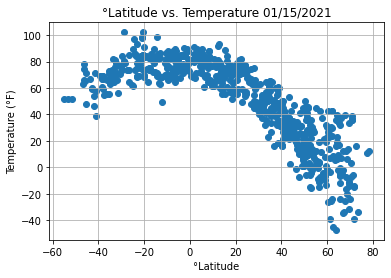

In [17]:
plt.scatter(results_df["Latitude"], results_df["Max Temp"])
plt.title(f"°Latitude vs. Temperature {d1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/max_temp.png")

<h1> °Latitude vs. Temperature <h1>
<h3>Not surprisingly, the highest temeratures are nearest the equator.  Since nearly 70% of the planets land is in the northern hemisphere, it makes sense that there are significantly fewer data points in the southern hemisphere.  The seasonal tilt of the Earths axis likely is the cause for relatively higher temps in the south compared to the north.<h3>

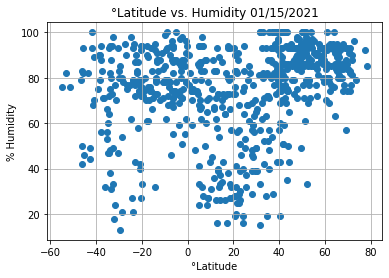

In [18]:
plt.scatter(results_df["Latitude"], results_df["Humidity"])
plt.title(f"°Latitude vs. Humidity {d1}")
plt.ylabel("% Humidity")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/humidity.png")

<h1> °Latitude vs. Humidity <h1>
<h3>Beyond a slight concentration of zero humidity locations, there appears to be little correlation between latitude and humidity levels.<h3>

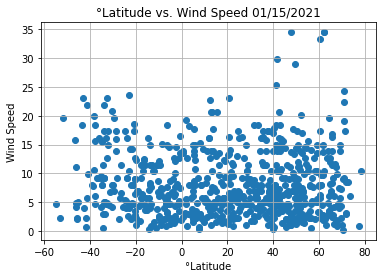

In [19]:
plt.scatter(results_df["Latitude"], results_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed {d1}")
plt.ylabel("Wind Speed")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/wind_speed.png")

<h1> °Latitude vs. Wind Speed <h1>
<h3>Althought the extreme northern latitudes do indicate an increased possibility of some of the higher wind speeds, most of the data indicates little correlation. It is important to note that we lack data points from the extreme southern latitudes that may better bring this significance into focus<h3>

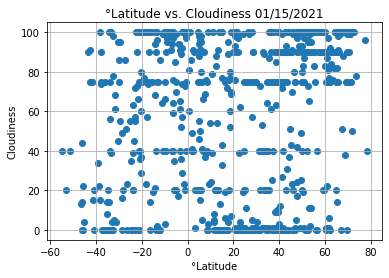

In [20]:
plt.scatter(results_df["Latitude"], results_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness {d1}")
plt.ylabel("Cloudiness")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/cloudiness.png")

<h1> °Latitude vs. Cloudiness <h1>
<h3>There appears to be no significant direct correlation between latitude and cloudiness.s<h3>

In [21]:
# create dataframe of cities in the northern hemisphere

north_hem = results_df.Latitude >= 0
north_df = results_df[north_hem]
north_df
north_df.to_csv("WeatherPy/north_df.csv")

In [22]:
# create dataframe of cities in the southern hemisphere

south_hem = results_df.Latitude < 0
south_df = results_df[south_hem]
south_df
south_df.to_csv("WeatherPy/south_df.csv")

In [23]:
from scipy import stats

def stats_linregress(x,y):
    res = stats.linregress(x,y)
    plt.plot(x, y, "+", label="Cities")
    plt.plot(x, res.intercept + res.slope* x, "r", label="Linear Regression", color="magenta")
    plt.legend()
    plt.xlabel("°Latitude")
    print(f"R-squared: {res.rvalue**2:.6f}")
#     plt.show()

# res = stats.linregress(south_df["Latitude"], south_df["Wind Speed"])

R-squared: 0.753608


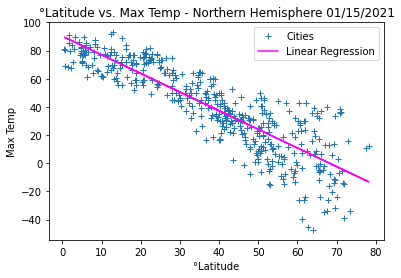

In [24]:
north_temp = stats_linregress(north_df["Latitude"], north_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Northern Hemisphere {d1}")
plt.ylabel("Max Temp")
plt.savefig("figures/north_temp.png")
# plt.show()


R-squared: 0.229148


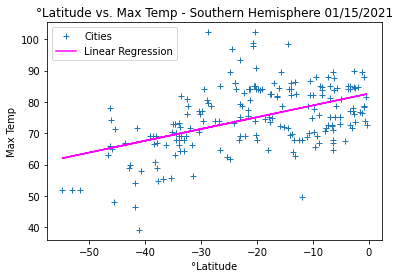

In [25]:
south_temp = stats_linregress(south_df["Latitude"], south_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Southern Hemisphere {d1}")
plt.ylabel("Max Temp")
# plt.show()
plt.savefig("figures/south_temp.png")

<h2>°Latitude vs. Max Temp<h2>
<img src="../figures/north_temp.png" height:50px/>
<img src="../figures/south_temp.png" height:50px/>
<h3>There is a much tighter coorelation to betweem max temp and latitude in the northern hemisphere.  This is likely due to the amount of data points and the relative diversity of the land dispersion in the southern hemisphere.<h3>


R-squared: 0.209364


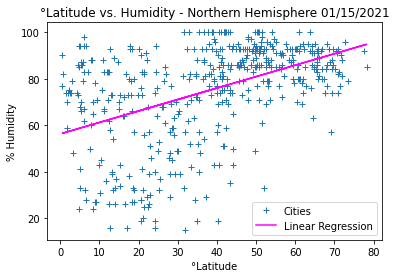

In [26]:
north_humidity = stats_linregress(north_df["Latitude"], north_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Northern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/north_humidity.png")
# plt.show()

R-squared: 0.050909


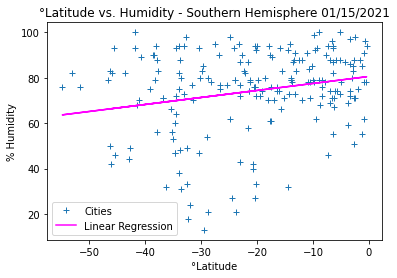

In [27]:
south_humidity = stats_linregress(south_df["Latitude"], south_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Southern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/south_humidity.png")
# plt.show()


<h2>°Latitude vs. Humidity<h2>
<img src="../figures/north_humidity.png" height:50px/>
<img src="../figures/south_humidity.png" height:50px/>
<h3>Although there is a a loose coorelation between latitude and humidity, and that the coorelation is similiar between the hemispheres, nearly all levels of humidity are present at all latitudes.<h3>

R-squared: 0.002095


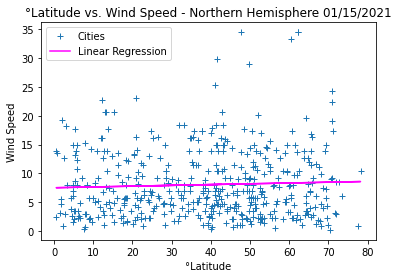

In [28]:
north_wind = stats_linregress(north_df["Latitude"], north_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Northern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/north_wind.png")
# plt.show()

R-squared: 0.050497


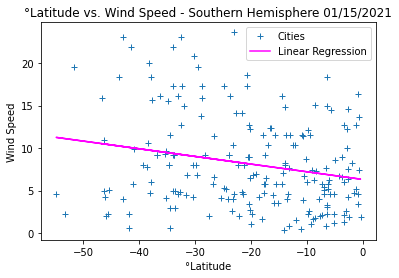

In [29]:
south_wind = stats_linregress(south_df["Latitude"], south_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Southern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/south_wind.png")
# plt.show()


<h2>°Latitude vs. Wind Speed<h2>
<img src="../figures/north_wind.png" height:50px/>
<img src="../figures/south_wind.png" height:50px/>
<h3>There is not a notable coorelation between latitude and wind speed.<h3>

R-squared: 0.098773


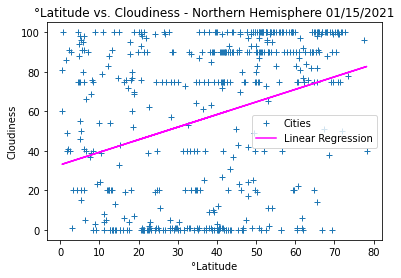

In [30]:
north_cloudiness = stats_linregress(north_df["Latitude"], north_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Northern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/north_cloudiness.png")
# plt.show()

R-squared: 0.169715


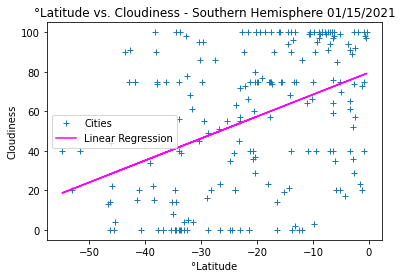

In [31]:
south_cloudiness = stats_linregress(south_df["Latitude"], south_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Southern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/south_cloudiness.png")
# plt.show()


<h2>°Latitude vs. Cloudiness<h2>
<img src="../figures/north_cloudiness.png" height:50px/>
<img src="../figures/south_cloudiness.png" height:50px/>
<h3>There is not a notable coorelation between latitude and cloudiness.<h3>